## Exploratory Data Analysis of Titanic Data

### Importing Required Libraries

In [50]:
#let's import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the Data


In [51]:
#let's read our dataset
##### SibSp is count of sibling and spouse
##### Parch is count of parent and children
##### Embarked represents the port from which a passenger boarded the Titanic
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Finding Missing Data

In [52]:
#let's find the missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### Visualize Missing Data

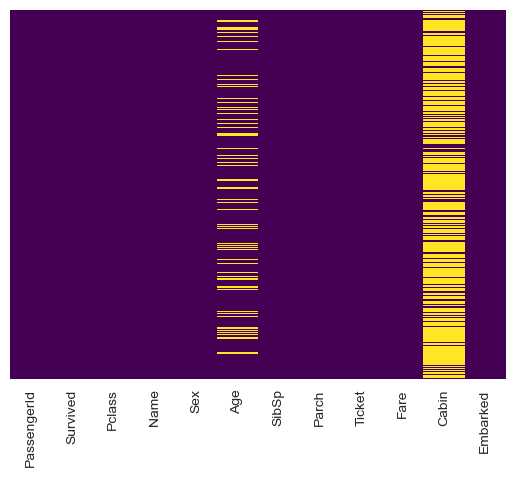

In [53]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Let's visualize the data

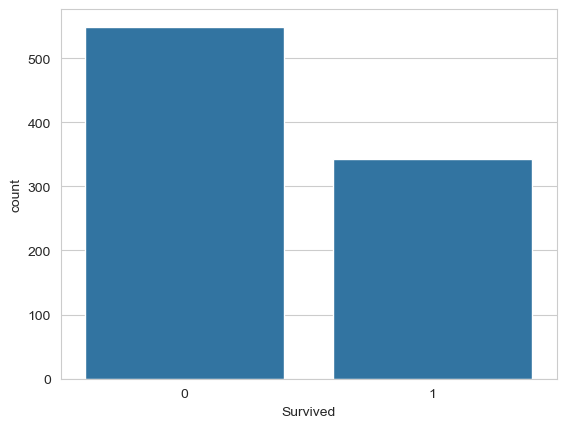

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.show()

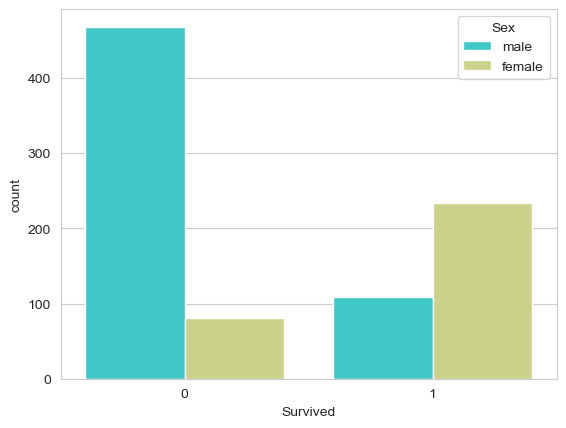

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train, palette='rainbow')
plt.show()

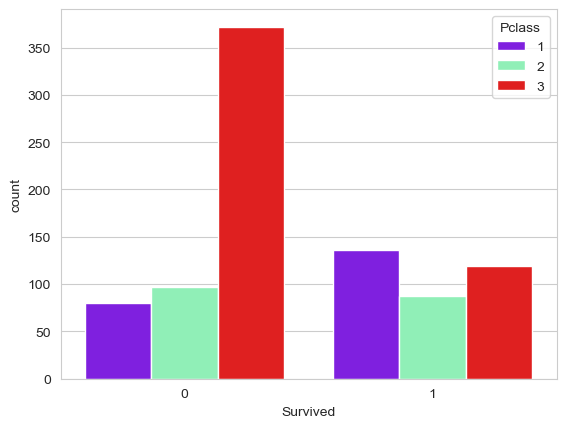

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')
plt.show()

C:\Users\rimsha.ishfaq\AppData\Local\Temp\ipykernel_9480\220434566.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




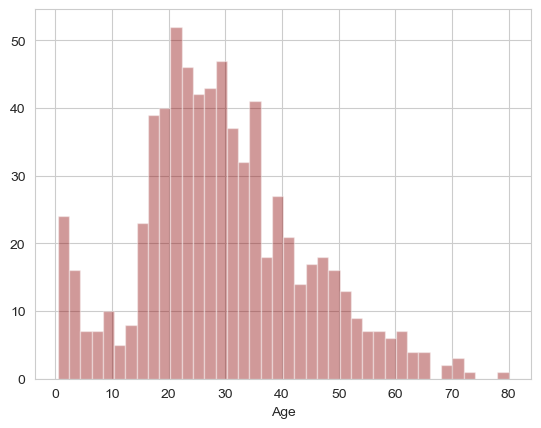

In [57]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)
plt.show()

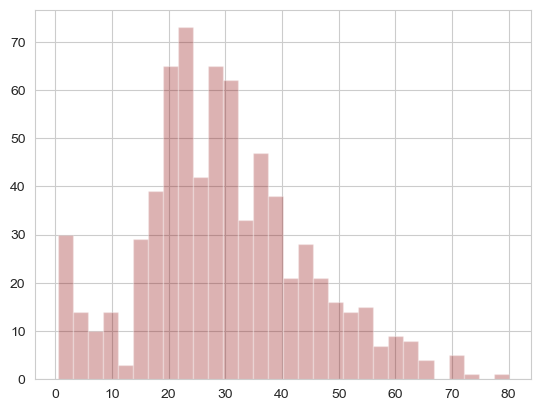

In [58]:
train['Age'].hist(bins=30,color='darkred', alpha=0.3)
plt.show()

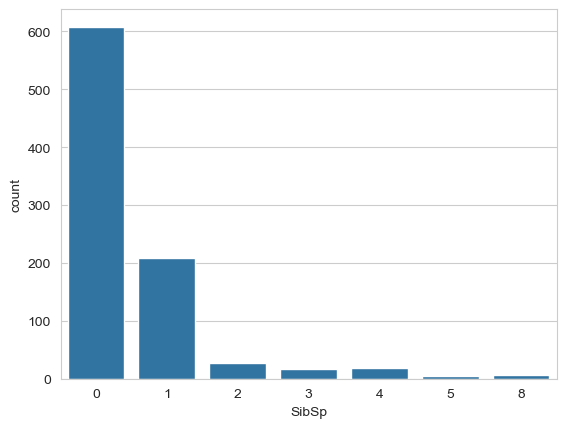

In [59]:
sns.countplot(x='SibSp', data=train)
plt.show()

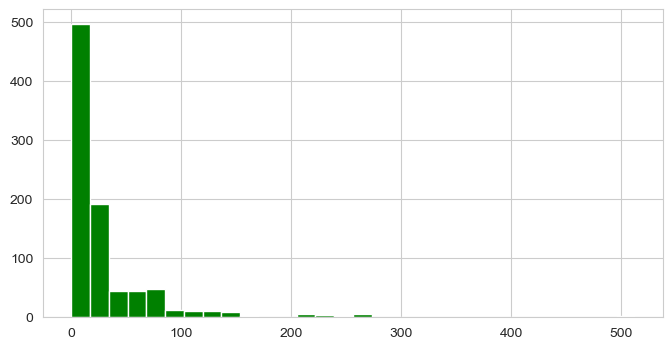

In [60]:
train['Fare'].hist(color='green', bins=30, figsize=(8,4)) 
plt.show()

### Let's visualize it using Cufflinks

In [61]:
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable


In [62]:
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist', bins=30, color='red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

### Data Cleaning

### We will try to fill the missing values, instead of dropping them. One way of doing this is by replacing the missing value with mean value
Look, we can see a relation between passenger class and their age. So, we can fill the missing values by average passenger age.

C:\Users\rimsha.ishfaq\AppData\Local\Temp\ipykernel_9480\2805814579.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




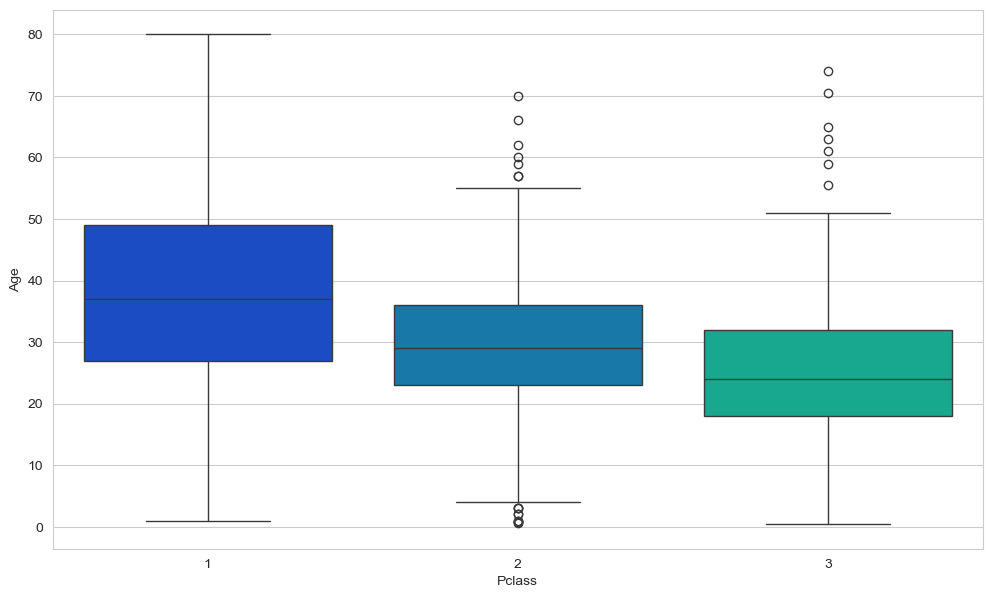

In [63]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')
plt.show()

In [64]:
## 
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24

    else:
        return Age

In [65]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\rimsha.ishfaq\AppData\Local\Temp\ipykernel_9480\3056732244.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\rimsha.ishfaq\AppData\Local\Temp\ipykernel_9480\3056732244.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



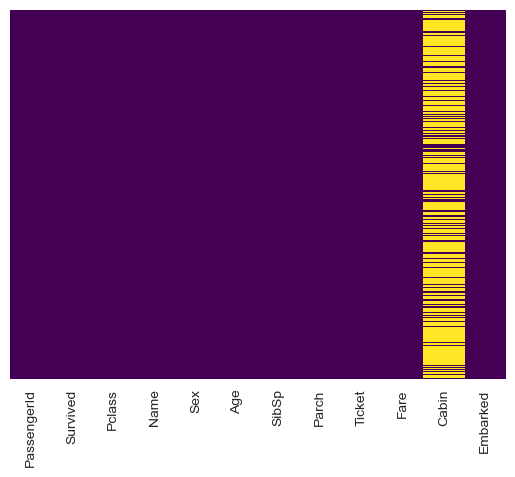

In [66]:
#let's see the heatmap if missing values in age column has been filled or not
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
#let's drop cabin column
train.drop('Cabin',axis=1,inplace=True)

### Converting Categorical Features

#### Let's convert categorical features into dummy variable, to make our Machine Learning algorithm work.

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [70]:
#using one_hot encoding to convert it into dummy variable
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [71]:
#let's create necessary dummy variable column

sex=pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [72]:
#let's drop all the unnecessary columns

train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [74]:
#let's append the columns we created in the data

train=pd.concat([train,sex,embark], axis=1)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### Apply Logistic Regression Model

#### Train Test Split

In [76]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [77]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split


In [79]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

### Training and Predicting

In [80]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [82]:
#okay, let's try increasing no. of iterations
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)  # Increase max_iter from the default 100
logmodel.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [87]:
predictions = logmodel.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[135,  19],
       [ 41,  73]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7761194029850746

In [93]:
predictions


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

### Evaluation

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



### Inferential Stats

In [96]:
#let's perform correlation test to know if there is any correlation between survived and Fare
#I will select random samples fron it
total_rows = len(train)
total_rows



891

In [97]:
#I will take 10% of data
sample_size = int(total_rows * 0.1)
sample_size


89

In [98]:
sample = train.sample(n=sample_size, random_state=42)
sample

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
709,710,1,3,24.0,1,1,15.2458,True,False,False
439,440,0,2,31.0,0,0,10.5000,True,False,True
840,841,0,3,20.0,0,0,7.9250,True,False,True
720,721,1,2,6.0,0,1,33.0000,False,False,True
39,40,1,3,14.0,1,0,11.2417,False,False,False
...,...,...,...,...,...,...,...,...,...,...
174,175,0,1,56.0,0,0,30.6958,True,False,False
493,494,0,1,71.0,0,0,49.5042,True,False,False
215,216,1,1,31.0,1,0,113.2750,False,False,False
309,310,1,1,30.0,0,0,56.9292,False,False,False


In [99]:
# Select specific columns from the sample
sample_1 = sample[['Survived', 'Fare']]

# Display the resulting DataFrame
print(sample_1)


     Survived      Fare
709         1   15.2458
439         0   10.5000
840         0    7.9250
720         1   33.0000
39          1   11.2417
..        ...       ...
174         0   30.6958
493         0   49.5042
215         1  113.2750
309         1   56.9292
822         0    0.0000

[89 rows x 2 columns]


In [100]:
# Calculate the correlation between two numeric columns in the sample
correlation = sample_1.corr()

# Display the correlation matrix
print(correlation)


          Survived      Fare
Survived  1.000000  0.347596
Fare      0.347596  1.000000
